### 问题描述
1. 试画图说明极线几何关系，并指出极点、极线所在，解释极线约束。
2. 结合本质矩阵的定义，说明本质矩阵的意义，同时思考与上一周中平面点对应透视矩阵的区别。
3. 说明三维重构的步骤，并指出输入及输出要求。
4. 说明特征匹配的步骤，进一步说明基于k-d树的特征匹配方法的思路。
5. 说明RANSAC方法的基本思想及实施步骤。

# 试画图说明极线几何关系，并指出极点、极线所在，解释极线约束。

极线几何（Epipolar Geometry）描述的是两副视图之间的内在射影关系，与外部场景无关，只依赖于摄像机内参数和这两幅视图之间的相对姿态
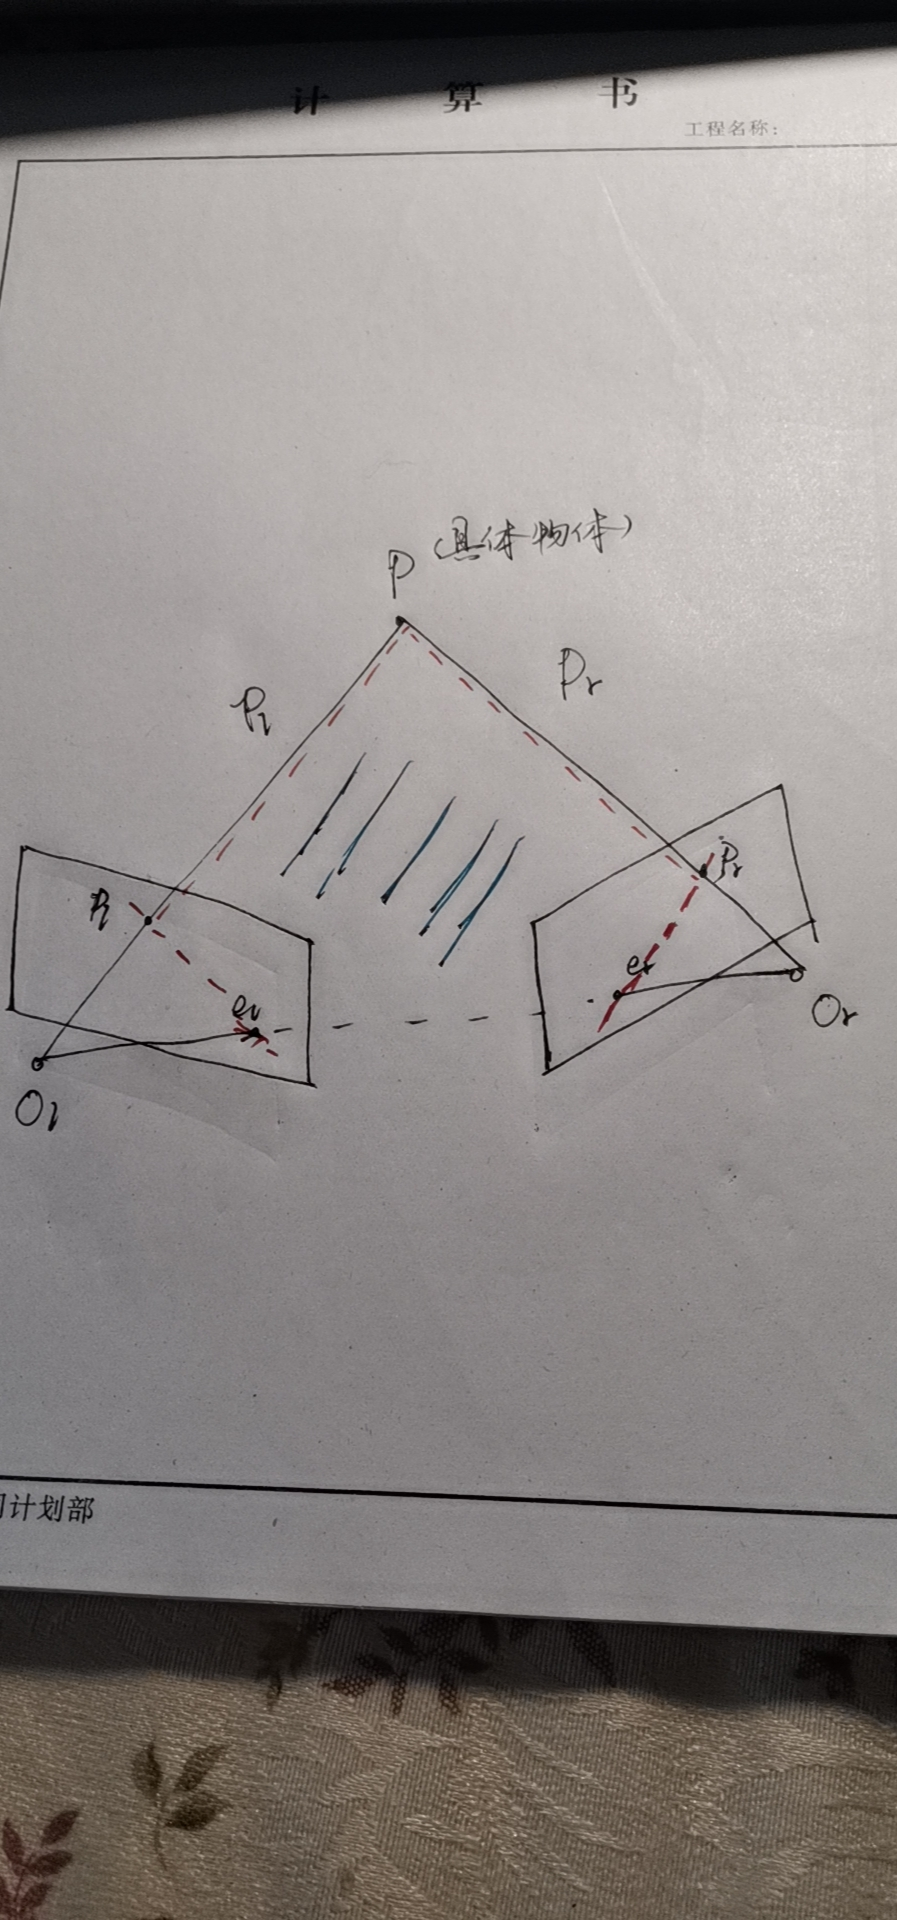

## 极点、极线：
- 两个相机坐标系的原点$O_l$和$O_r$和现实物体$P$点三个点确定的平面为**极平面**
- 两个相机的相机坐标系原点的连线$O_lO_r$叫做**基线**(一条)
- 基线$O_lO_r$与两摄像机的图像平面的交点$e_l$和$e_r$就是**极点**(两个)
- 进而物体$P$点在图像平面的投影点$p_l$和$p_r$与该平面的极点$e_l$和$e_r$的连线$p_le_l$和$p_re_r$即为**极线**(两条)

简而言之，极平面与两个相机图像平面相交的两条线段即为两个图像平面上的极线

## 极线约束：

$P、O_l、O_r$这3个点确定了一个极平面，而与两个摄像机的图像平面又有两条极线相交，根据双目视觉对应关系，同一个点在两幅图像上的映射，已知左图映射点$p_l$，那么右摄像机相对于$p_1$的映射点，一定在的极线$p_re_r$上，依据该性质，可以减少待匹配的特征点数量  


进一步理解，因为单目视觉（如只有一个左相机图像）模型通过自己像平面上的一个投影点无法知道真实点在坐标系中的$Z$轴坐标，需要到有右相机图像中找到真实点投影才能确定其$Z$轴坐标，也就是三维坐标；但是右相机图像平面上点非常多，此时通过极线约束可知，其投影必然出现在与$p_l$对应的$p_r$极线上。

# 结合本质矩阵的定义，说明本质矩阵的意义，同时思考与上一周中平面点对应透视矩阵的区别。

## 本质矩阵$E$(Essential Matrix)：

是极线几何(Epipolar geometry)理论中的另外一个基本参量，其物理意义为，在三维空间内，同一个（或一组）空间三维点$P$**在不同视角相机**下的**摄像机坐标系**中的彼此之间的表示关系

可以根据多个空间点及其对应的左右像平面坐标求出本质矩阵$E$，当满足$\widetilde{p}_r^T[t]_xR\widetilde{p}_l=0$时(其中$\widetilde{p}_r$和$\widetilde{p}_l$为两个摄像机的图像坐标)，则本质矩阵$E=[t]_xR$，在此基础上利用奇异值分解，反算出缸体旋转矩阵$R$和平移向量$t$，得到两个相机之间的姿态位置（旋转和平移）关系

## 与透视矩阵区别：
- 透视矩阵：将一个三维空间点投影到一个新的视平面的转换关系（三维→二维），且与相机内参矩阵有关系
- 本质矩阵：同一物体分别在两个像平面上的对应关，只与外参数矩阵有关（$R$和$t$），与内参数无关

# 说明三维重构的步骤，并指出输入及输出要求。

## 提取特征点，建立特征匹配
- 输入：两个摄像机拍摄的图像
- 输出：在两图像上检测到的特征点进行匹配后得到的特征点对集

## 计算视差
- 输入：空间点在两个相机图像坐标系各自的$x$轴方向像素坐标$u_1$和$u_2$, 根据特征匹配算法生成视差图像
- 输出：筛选出视差图像里颜色较深的特征点, 根据基本公式$z_l=\frac{bf_x}{u_1-u_2}$计算出, 使用深度映射将像素重投影到三维空间中

## 计算世界坐标
- 输入：相机内参数$f_x$和$f_y$、空间点在两个相机图像平面的坐标、基线和视差
- 输出：计算出特征点对应的空间点的三维坐标, 并合并至一起形成点云数据

## 三角剖分
- 输入：特征点点云数据图
- 输出：利用Delaunay算法生成三角网（任意四个点不共圆）, 以便接下来的可视化

## 三维重构
- 输入：Delaunay三角网
- 输出：三维重构结果

# 说明特征匹配的步骤，进一步说明基于k-d树的特征匹配方法的思路。

## k-d树

k-d树的根节点和中间节点存储的是对某个维度的划分信息，只有叶节点里才是存储的值。在计算机视觉领域应用Kd-Tree较多的是在特征点匹配的时候，例如SIFT特征点匹配的时候，需要两两比对特征描述子的128位特征描述向量，选取汉明距离最小的做为最佳匹配点，这个时候因为要将多个特征描述向量进行大量的查找比对  
对于每一层，可以指定一个划分维度（轴垂直分区面axis-aligned splitting planes）。最简单的就是按照关键字轮流划分（例如：奇数层按照x轴划分，也即第一个关键字；偶数层按照y轴划分，也即第二个关键字）
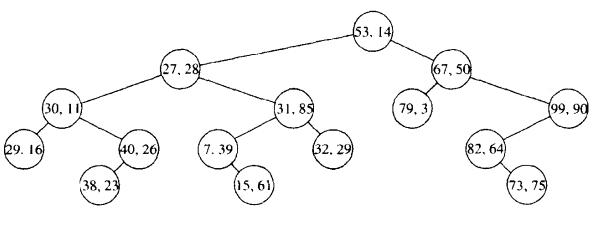

## 建立k-d树
对于所有的样本点，统计它们在每个维上的方差，挑选出方差的最大值，对应的维就是分裂域的值。数据方差最大表示沿该维度数据点分散得比较开，这个方向上进行数据分割可以获得最好的分辨率；然后再将所有样本点按其第该维的值进行排序，位于正中间的那个数据点选为分裂结点对应域。重复上述过程直至获得所有叶子节点显示了构建这棵二叉树的所有步骤

## 运用k-d树最近邻查询算法
1. 首先通过将查找点数据根结点数据对应维上的值相比较，按照二叉搜索的方式，顺着“搜索路径”找到最近邻的近似点，也就是与查询点处于同一个子空间的叶子节点
2. 为了防止漏查与查找点跟进的距离的点，回溯搜索路径，并且判断搜索路径上节点的其他子节点空间中是否还有距离查询点更近的数据点，如果有，则需要跳到其他子节点空间中去搜索
3. 重复这个过程直到搜索路径为空
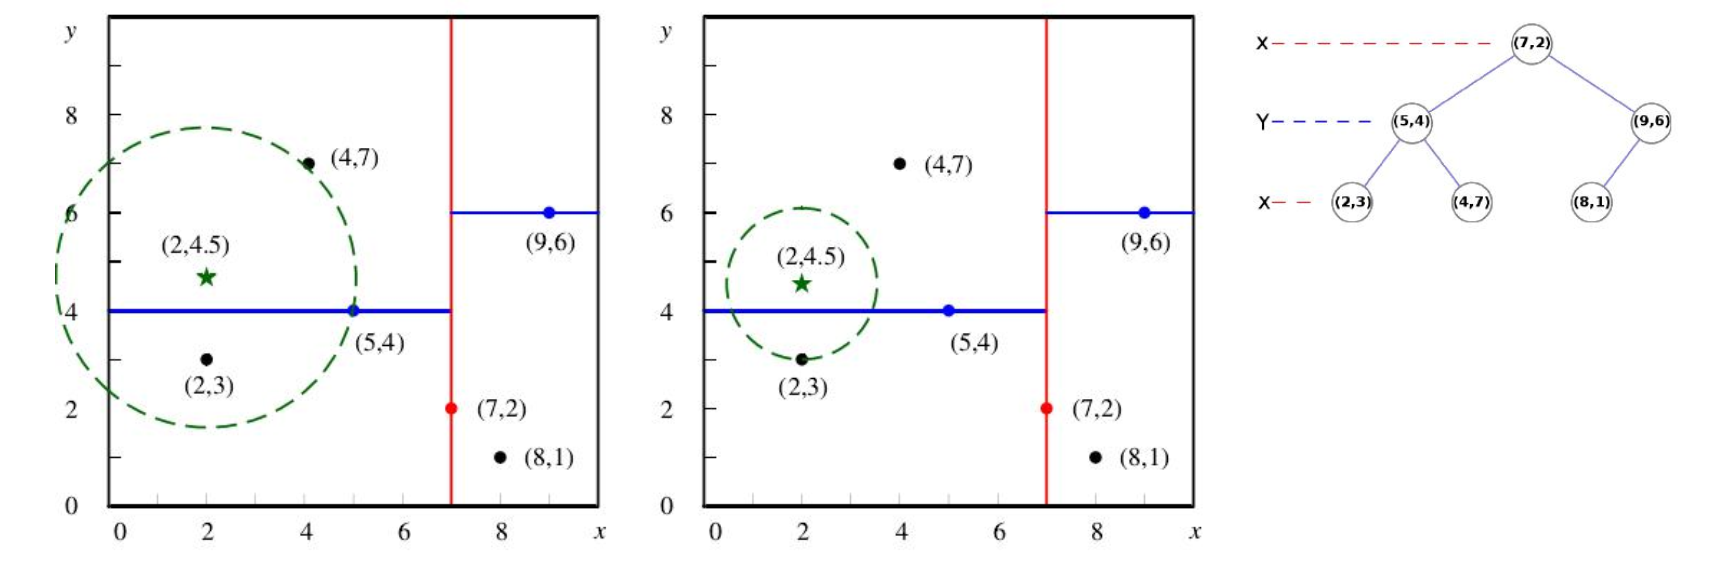

## k-d树的相关优化算法

### BBF(Best Bin First)
BBF的查询思路就是将“查询路径”上的节点进行排序，如按各自分割超平面（称为Bin）与查询点的距离排序,优先考虑距离小的点。BBF还设置了一个运行超时限制，当优先级队列中的所有节点都经过检查或者超出时间限制时，算法返回当前找到的最好结果作为近似的最近邻

### 随机k-d森林
同时独立建立多个k-d树，每棵树在具有大方差的各维中(如top-5)随机选择。查询时，并行查询多个k-d树，按照BBF准侧将候选节点放在同一队列中

# 说明RANSAC方法的基本思想及实施步骤。

## RANSAC方法的基本思想
RANSAC通过反复选择数据中的一组随机子集建立模型，通过这个模型去测试所有其他数据，寻找适用模型的局内点，再利用所有的局内点去重新估计模型，得到最终优化后的模型

## RANSAC方法实施步骤
1. 有一个模型适应于假设的局内点，即所有的未知参数都能以假设的局内点计算得出。
2. 用1）中得到的模型去测试所有的其他数据，如果某个点适用于估计的模型，认为它也是局内点
3. 如果有足够多的点被归类为假设的局内点，那么估计的模型就足够合理
4. 然后，用所有假设的局内点去重新估计模型，因为它仅仅被初始的假设局内点估计过
5. 最后，通过估计局内点与模型的错误率来评估模型

这个过程被重复执行固定的次数，每次产生的模型要么因为局内点太少而被舍弃，要么因为比现有的模型更好而被选用